In [1]:
import sys
sys.version

'3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [3]:
pinkwink_web = pd.read_csv('https://raw.githubusercontent.com/rrkcl7733/DataScience/master/data/08.%20PinkWink%20Web%20Traffic.csv',
                          encoding='utf-8', thousands=',', names=['date', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.tail()

,hit
date,
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0
17. 6. 29.,1328.0
17. 6. 30.,1193.0


In [4]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [5]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))


In [6]:
print(time, traffic)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.62841018946943
429.5328046676293
330.47773081609824


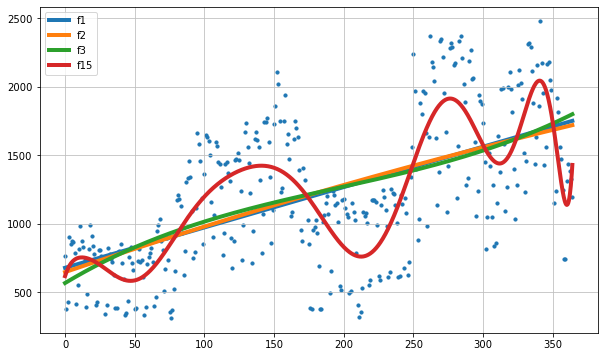

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

In [9]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [10]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,684.083203,1095.591369
421,2017-08-26,481.544412,269.639667,702.134767
422,2017-08-27,614.212001,396.398301,816.157817
423,2017-08-28,1166.966207,955.761713,1362.726987
424,2017-08-29,1203.000155,991.423859,1404.493849


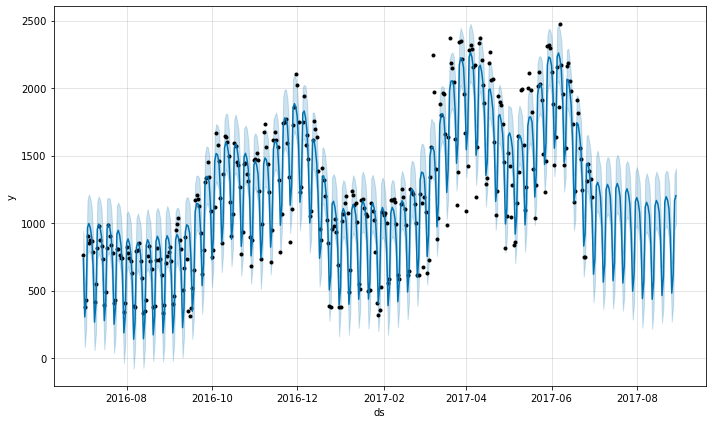

In [12]:
m.plot(forecast);

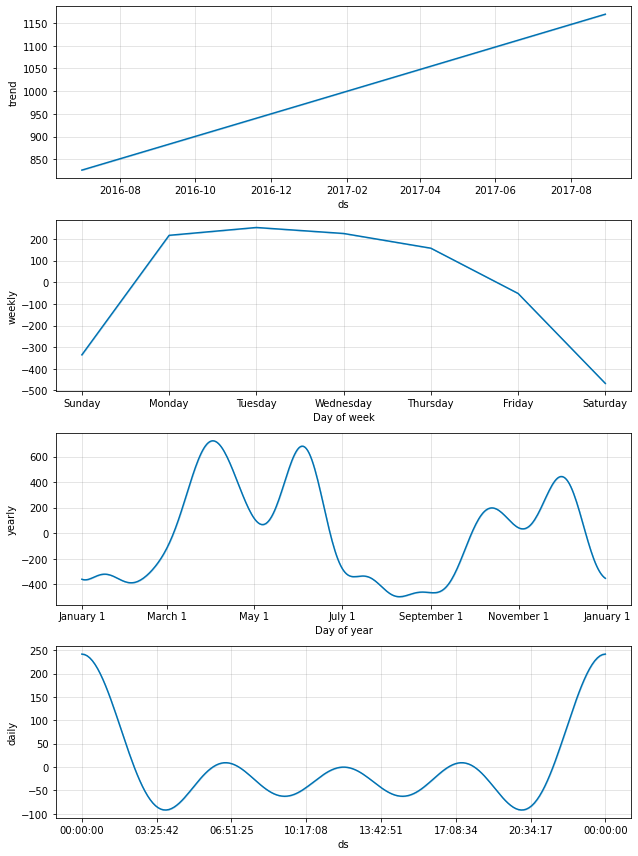

In [13]:
m.plot_components(forecast);

In [14]:
# 7-2 Seasonal 시계열 분석으로 주식 데이터 분석하기

In [22]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start = datetime(2003, 1, 1) 
end = datetime(2022, 4, 4) 
SJ = web.DataReader('005930.KS','yahoo',start,end)
SJ.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-29,70300.0,69800.0,70000.0,70200.0,13686208.0,70200.0
2022-03-30,70500.0,69800.0,70300.0,69900.0,12670187.0,69900.0
2022-03-31,70200.0,69600.0,69900.0,69600.0,12510366.0,69600.0
2022-04-01,69500.0,69000.0,69500.0,69100.0,15916846.0,69100.0
2022-04-04,69300.0,68600.0,68900.0,69300.0,10785773.0,69300.0


<AxesSubplot:xlabel='Date'>

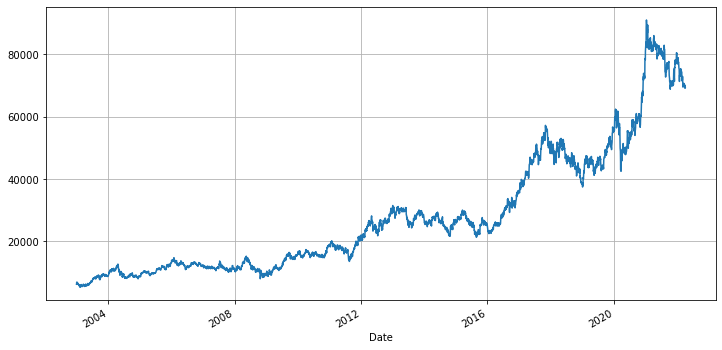

In [24]:
SJ['Close'].plot(figsize=(12, 6), grid=True)

In [48]:
SJ_trunc = SJ[:'2021-12-31']
SJ_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-01-01,6280.0,6280.0,6280.0,6280.0,0.0,4805.878418
2003-01-02,6460.0,6300.0,6380.0,6430.0,25580000.0,4920.668457
2003-01-03,7000.0,6640.0,6700.0,6880.0,55530000.0,5265.038574
2003-01-06,7030.0,6880.0,6940.0,6990.0,24970000.0,5349.219727
2003-01-07,7180.0,6840.0,7180.0,6850.0,28895000.0,5242.079590
...,...,...,...,...,...,...
2021-12-24,80800.0,80200.0,80200.0,80500.0,12086380.0,80138.101562
2021-12-27,80600.0,79800.0,80600.0,80200.0,10783368.0,79839.453125
2021-12-28,80400.0,79700.0,80200.0,80300.0,18226325.0,79939.000000


In [49]:
df = pd.DataFrame({'ds':SJ_trunc.index, 'y':SJ_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.tail()

,ds,y
4742,2021-12-24,80500.0
4743,2021-12-27,80200.0
4744,2021-12-28,80300.0
4745,2021-12-29,78800.0
4746,2021-12-30,78300.0


In [50]:
m = Prophet()
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
future = m.make_future_dataframe(periods=1825)
future.tail()

,ds
6567,2026-12-25
6568,2026-12-26
6569,2026-12-27
6570,2026-12-28
6571,2026-12-29


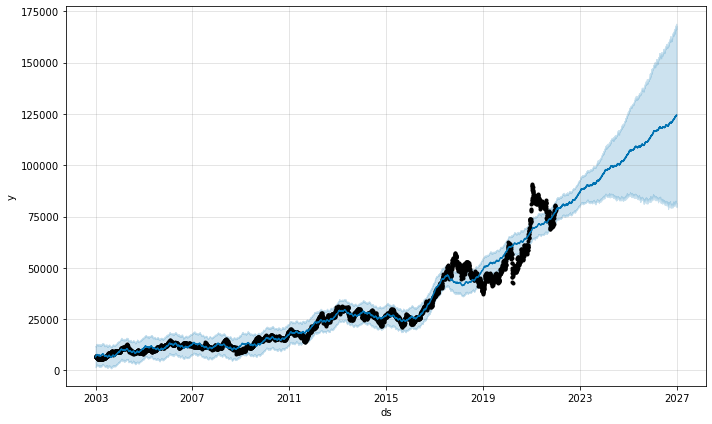

In [60]:
forecast = m.predict(future)
m.plot(forecast);

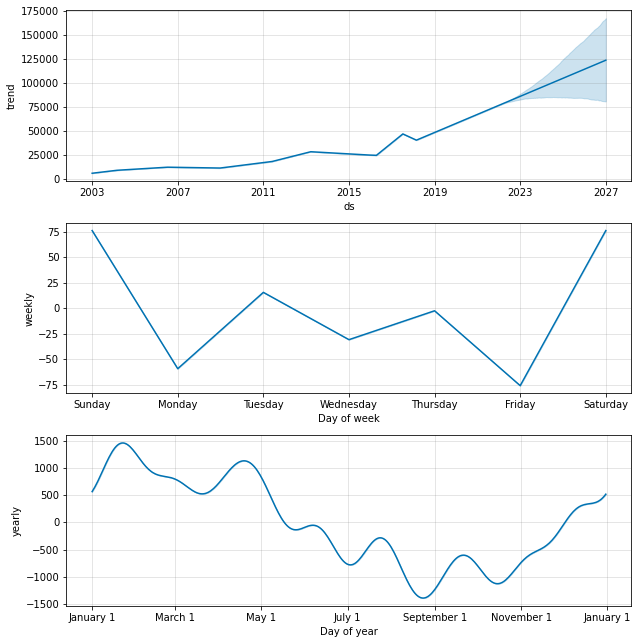

In [61]:
m.plot_components(forecast);

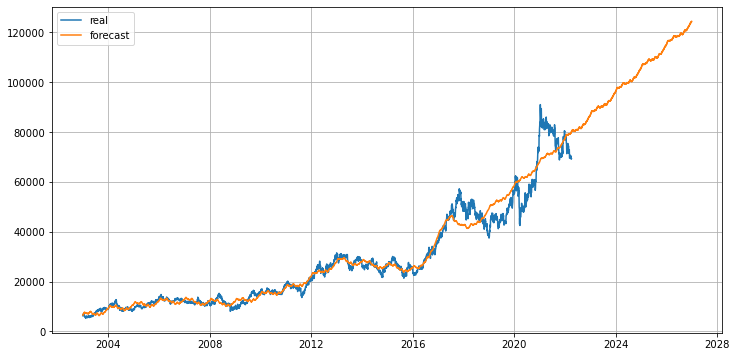

In [62]:
plt.figure(figsize=(12,6))
plt.plot(SJ.index, SJ['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [47]:
# 7-4 Growth Model과 Holiday Forecast

In [ ]:
C:\Users\user\Desktop\사용파일\데이터분석\데이터 분석\DATA\파이썬으로 데이터 주물럭\DataScience-master\data

In [19]:
df = pd.read_csv(r'C:\Users\user\Desktop\사용파일\데이터분석\데이터 분석\DATA\파이썬으로 데이터 주물럭\DataScience-master\data\08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [20]:
df['cap'] = 8.5

In [21]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

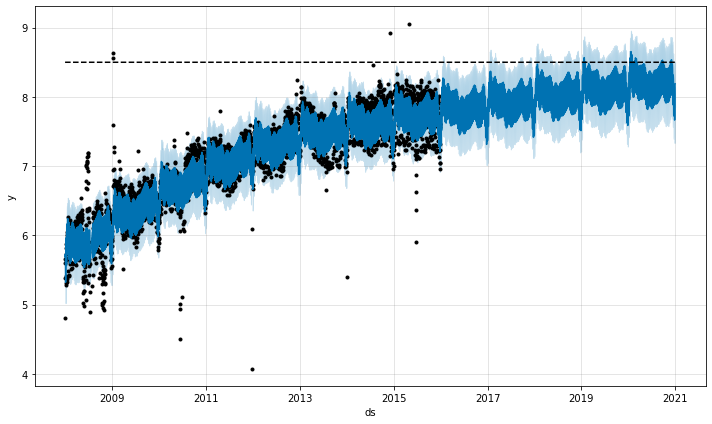

In [22]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

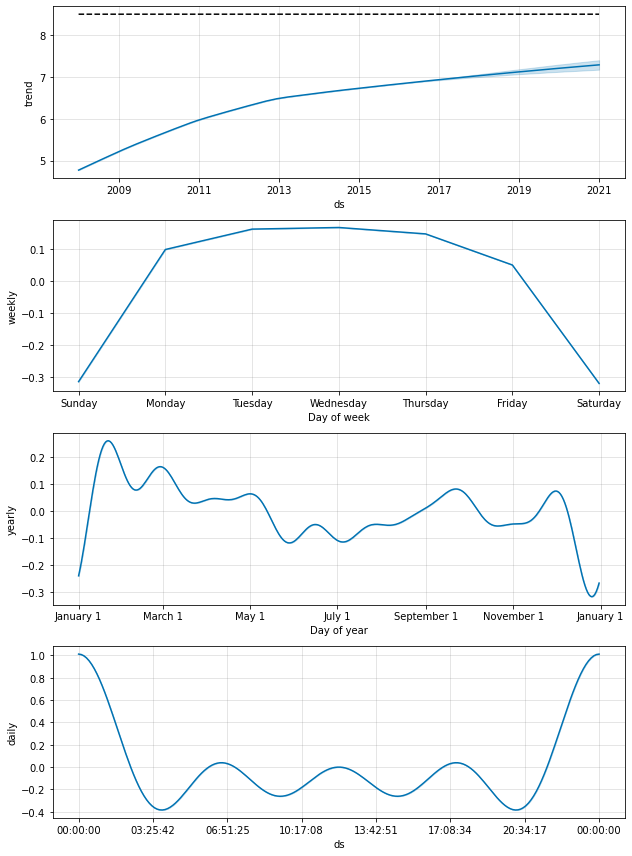

In [23]:
forecast = m.predict(future)
m.plot_components(forecast);